In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Chap 11. model metrics
## 11-1 회귀모델 평가 지표
- ME : 실제값과 예측값의 차이 평균
- MAE (Mean absolute error) : 실제값과 예측값의 차이를 절댓값으로 변환해 평균을 계산. 에러의 크기를 그대로 반영
    - 에러에 대한 손실이 선형적으로 올라가야 하거나 이상치가 많을때 적합. 
    - 지표가 직관적이며 예측변수와 단위가 같아 이해가 쉽다. 
    - 과소/과대 예측 평가 어려우며, 스케일 의돈적
- MAPE(Mean Absolute Percentage Error) : MAE의 퍼센트 변환
    - 예측값 대비 잔차의 비율. 비율변수라서 모델 간 성능비교 용이
    - 과소/과대 예측 어려우며, 0이 있을 경우 계산 불가능
- MPE(Mean Percentage Error) : MAPE에서 절대값 제외
    - 예측 방향 파악가능하나, 지표가 직관적이지 않고 예측변수와 단위가 다름
- MSE (Mean Squared Error) : 편차 제곱 평균
    - 지표 직관적
    - 예측 변수와 단위가 다르며, 스케일에 의존적. 
    - 잔차를 제곱하므로 이상치에 민감하며, 1미만의 에러는 더 작아지고 그 이상의 에러는 더 커진다
- RMSE (Root mean squared Error) : RMSE 최소화 했을 떄 결과가 최대가능도 방법과 결과가 같음
    - 직관적이며 동일한 단위. 잔차를 제곱해서 생기는 왜곡이 MSE에 비해 덜함
    - 이상치 영향 크며 스케일 의존적
- R2 (= Explained variance score) : 데이터에 대한 모델의 설명력
- MSLE (Mean Squared Log Error) : MSE 로그
- RMSLE (Root Mean Squared Log Error) 
- AIC (Akaike's Information Criterion) : 서로 다른 선형회귀 모형 성능 비교
    - 모형과 데이터의 확률 분포 사이의 kullback-leibler 수준을 가장 크게 하기 위한 시도
    - 작아야 모델과 비슷 $$-2logL_i + 2*(p+1)-2, \quad p:설명변수\ 개수,\ n:\ 데이터\ 개수,\ logL_i:최대로그가능도$$
- BIC (Bayesian Information Criterion) : AIC와 비슷하나 변수 추가에 대해 더 강한 벌점    
$$-2logL_i + log(n)*(p+1)-2, \quad p:설명변수\ 개수,\ n:\ 데이터\ 개수,\ logL_i:최대로그가능도$$

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from statsmodels.tools.eval_measures import rmse, rmspe

X, y = load_diabetes()['data'], load_diabetes()['target']

ss = StandardScaler()
X = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression().fit(X_train, y_train)
pred1 = lr.predict(X_test)

svr = SVR().fit(X_train, y_train)
pred2 = svr.predict(X_test)

def MAPE(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred)/y_true))*100
    return mape

def RMSLE(y_true, y_pred):
    rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
    return rmsle

titles = ['MAE', 'MAPE', 'MSE', 'RMSE', 'R2', 'MSLE', 'RMSLE']
functions = [mean_absolute_error, MAPE, mean_squared_error, rmse, r2_score, mean_squared_log_error, RMSLE]

print(">> Linear Regression vs SVM")
for title, function in zip(titles, functions):
    score1 = function(y_test, pred1)
    score2 = function(y_test, pred2)
    print(f"{title}: {score1:.2f} vs {score2:.2f}")


>> Linear Regression vs SVM
MAE: 41.32 vs 53.14
MAPE: 35.02 vs 44.36
MSE: 2805.81 vs 4091.64
RMSE: 52.97 vs 63.97
R2: 0.44 vs 0.18
MSLE: 0.15 vs 0.20
RMSLE: 0.38 vs 0.45


## 11-2 분류모델 평가지표
- True Positive : 1을 1로 맞게 예측한 데이터 갯수
- False Negative(=Type 2 error) : 1을 0으로 잘못 예측한 데이터의 갯수
- False Positive(=Type 1 error) : 0을 1로 잘못 예측한 데이터 갯수
- True Negative : 0을 0으로 맞게 예측한 데이터 갯수

- Accuracy : 전체 데이터 중 맞게 분류한 데이터 비율 $\frac{(TP+TN)}{(TP+TN+FP+FN)}$
- Precision : 예측을 1이라고 한 데이터 중, 1로 맞게 예측한 비율 $\frac{(TP)}{(TP+FP)}$
- Recall(Sensitivity) : 실제로 1인 데이터들 중, 1로 맞게 예측한 비율 $\frac{(TP)}{(TP+FN)}$
- Specificity : 실제로 0인 데이터들 중, 0으로 맞게 예측한 비율 $\frac{(TN)}{(TN+FP)}$
- Negative predictive value : 예측을 0이라고 한 데이터 중 0으로 맞게 예측한 데이터 비율 $\frac{(TN)}{(TN+FN)}$
- F1-score : 정밀도와 재현율의 조화평균
- Precision-recall curve : 확률 임계값에 따른 precision-recall의 변화를 보여주어 최적 확률 임곗값을 찾게 함
    - 정밀도와 재현율은 trade-off : 잘못된 예측을 줄이고 싶다면 정밀도 중시, 실제 양성인 데이터를 최대한 예측하고 싶다면 재현율 중시
        - 확률 임계값이 커질수록 FP는 줄어들고, FN이 많아져 정밀도가 커지고 재현율을 작아짐 => 정밀도 중시할 경우 확률 임계값을 높이면 됨
- ROC(Receiver operating characteristic) curve : 예측값을 양성으로 판단하는 확률 임계값을 1에서 0으로 움질일때 FP 비율과, TP 비율을 그래프와
    - 정확하게 예측할 경우 (0,1)을 지나며, 랜덤 예측의 경우 대각선
    - FPR = (FP/(FP+TN)) = (1-specificity)
    - TPR = (TP/(TP+FN)) = recall
- Log Loss : 실제값을 예측하는 확률에 로그를 취하여 부호 반전 $-\frac{1}{N}\sum^N_{i=1}logp'_i$
- 이익도표 : 상위 등급에서 더 높은 반응률을 보이는 것이 좋은모형
    - lift : 모델이 다른 확률 컷오프에 대해 비교적 드문 1을 얼마나 효과적으로 구분하는지
        - 십분위로 구분 후 각 구간의 반응률 산출

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, log_loss, matthews_corrcoef, cohen_kappa_score, confusion_matrix

X, y = load_breast_cancer()['data'], load_breast_cancer()['target']

ss = StandardScaler()
X = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LogisticRegression().fit(X_train, y_train)
pred1 = lr.predict(X_test)

svr = SVC().fit(X_train, y_train)
pred2 = svr.predict(X_test)

titles = ['accuracy', 'precision', 'recall', 'f1_score', 'log_loss', 'MCC', 'cohen']
functions = [accuracy_score, precision_score, recall_score, f1_score, log_loss, matthews_corrcoef, cohen_kappa_score]

print(">> Logistic Regression vs SVM")
for title, function in zip(titles, functions):
    score1 = function(y_test, pred1)
    score2 = function(y_test, pred2)
    print(f"{title}: {score1:.2f} vs {score2:.2f}")

lr_cm = pd.DataFrame(confusion_matrix(y_test, pred1), index=['실제값(N)', '실제값(P)'], columns=['예측값(N)', '예측값(P)'])
svm_cm = pd.DataFrame(confusion_matrix(y_test, pred2), index=['실제값(N)', '실제값(P)'], columns=['예측값(N)', '예측값(P)'])

print(">> Logistic regression confusion matrix: \n", lr_cm)
print("\n>> SVM confusion matrix: \n", svm_cm)

lr_report = classification_report(y_test, pred1)
svm_report = classification_report(y_test, pred2)
print(">> Logistic regression regression report: \n", lr_report)
print("\n>> SVM report: \n", svm_report)


>> Logistic Regression vs SVM
accuracy: 0.99 vs 0.99
precision: 0.99 vs 0.99
recall: 1.00 vs 0.99
f1_score: 0.99 vs 0.99
log_loss: 0.24 vs 0.48
MCC: 0.99 vs 0.97
cohen: 0.99 vs 0.97
>> Logistic regression confusion matrix: 
         예측값(N)  예측값(P)
실제값(N)      53       1
실제값(P)       0      89

>> SVM confusion matrix: 
         예측값(N)  예측값(P)
실제값(N)      53       1
실제값(P)       1      88
>> Logistic regression regression report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.99      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143


>> SVM report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.99      0.99      0.99        89

    accuracy                           0.99       143
  

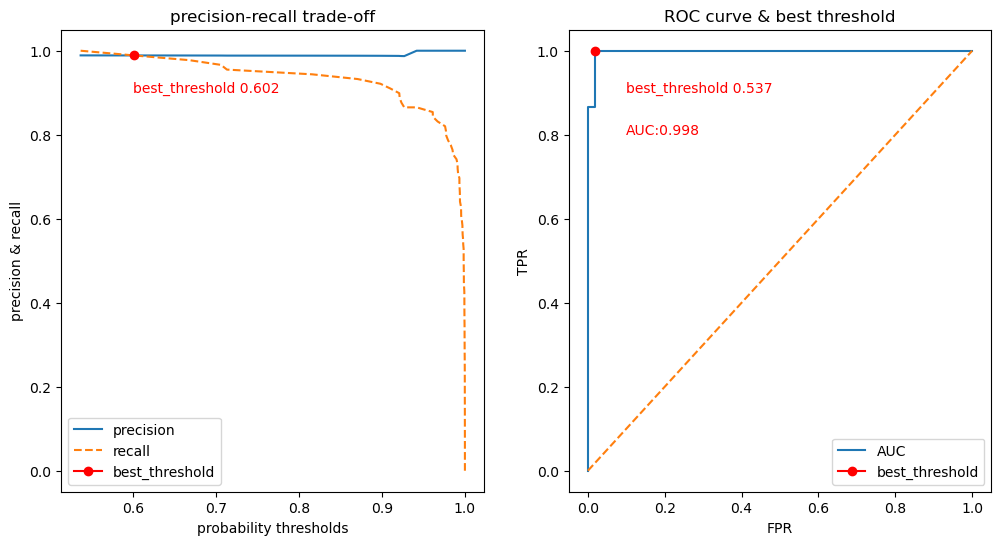

In [9]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

pred = lr.predict(X_test)
prob = lr.predict_proba(X_test)[:, 1]

# prec vs recall 차이 최소지점 찾기
precision, recall, thresholds = precision_recall_curve(y_test, prob)
thresholds = list(thresholds) + [1]
idx = np.argmin(np.abs(precision - recall))
best_threshold = thresholds[idx]

fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].set_title("precision-recall trade-off")
ax[0].plot(thresholds, precision, label='precision')
ax[0].plot(thresholds, recall, label='recall', linestyle='dashed')
ax[0].plot(best_threshold, recall[idx], marker='o', color='red', label='best_threshold')
ax[0].text(0.6, 0.9, f'best_threshold {best_threshold:.3f}', color='red')
ax[0].legend()
ax[0].set_xlabel('probability thresholds')
ax[0].set_ylabel('precision & recall')

# ROC AUC 최대지점 찾기
fpr, tpr, thresholds = roc_curve(y_test, prob)
auc = roc_auc_score(y_test, prob)

# best thresholds(=cut-off value) 찾기
J = tpr - fpr
idx = np.argmax(J)
best_threshold = thresholds[idx]
best_tpr = tpr[idx]
best_fpr = fpr[idx]

ax[1].set_title("ROC curve & best threshold")
ax[1].plot(fpr, tpr, label='AUC')
ax[1].plot([0,1], [0,1], linestyle='dashed')
ax[1].plot(best_fpr, best_tpr, marker='o', color='red', label='best_threshold')
ax[1].text(0.1, 0.9, f'best_threshold {best_threshold:.3f}', color='red')
ax[1].text(0.1, 0.8, f"AUC:{auc:.3f}", color='red')
ax[1].legend()
ax[1].set_xlabel('FPR')
ax[1].set_ylabel('TPR')
plt.show()

baseline_lift: 0.622
lift chart:
         pred_prob  y_true  captured_R         R      lift
Decile                                                   
1       13.999471      14    0.157303  0.979021  1.573034
2       13.997023      14    0.157303  0.979021  1.573034
3       13.989482      14    0.157303  0.979021  1.573034
4       13.962113      14    0.157303  0.979021  1.573034
5       13.859869      14    0.157303  0.979021  1.573034
6       13.134092      13    0.146067  0.909091  1.460674
7        4.740002       6    0.067416  0.419580  0.674157
8        0.049989       0    0.000000  0.000000  0.000000
9        0.001460       0    0.000000  0.000000  0.000000
10       0.000008       0    0.000000  0.000000  0.000000 



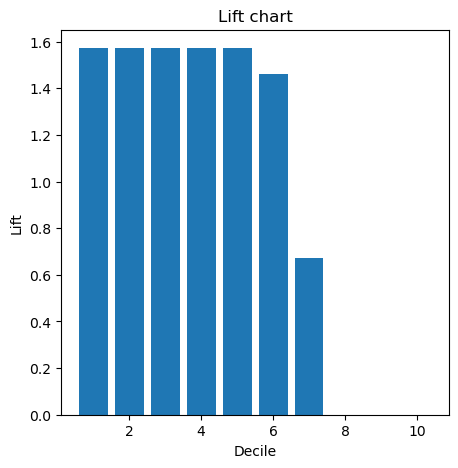

In [12]:
# Lift chart - 예측된 확률과 실제 클래스를 확률 내림차순으로 정렬
rank = pd.DataFrame({"pred_prob":prob, 'y_true':y_test}).sort_values(by='pred_prob', ascending=False).reset_index(drop=True)

rank['Decile'] = 10
start = 0
end = len(rank)//10
end_start = end-start
decile = 1
while end < len(rank):
    for i in range(start, end):
        rank['Decile'][i] = decile
    decile += 1
    start = end
    end += len(rank)//10

# baseline lift 계산 및 실구매자수 집계
total = len(y_test)
count = y_test.sum()
baseline_lift = count/total
print(f"baseline_lift: {baseline_lift:.3f}")
liftchart = rank.groupby("Decile").sum()

liftchart['captured_R'] = liftchart['y_true']/count
liftchart['R'] = liftchart['y_true'] / (total/10)
liftchart['lift'] = liftchart['R']/baseline_lift
print("lift chart:\n", liftchart, '\n')

plt.rcParams['figure.figsize'] = (5,5)
plt.title('Lift chart')
plt.bar(liftchart.index, liftchart['lift'])
plt.ylabel("Lift")
plt.xlabel("Decile")
plt.show()

In [13]:
# multi-class 분류 모델 평가

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

load = load_wine()
X = load['data'][:, :5]
y = load['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

svm = SVC(C=1, kernel='rbf', gamma='auto', probability=True)
svm.fit(X_train, y_train)
pred = svm.predict(X_test)
prob = svm.predict_proba(X_test)[:, 1]

titles = ['accuracy', 'precision', 'recall', 'f1_score']
functions = [accuracy_score, precision_score, recall_score, f1_score]
for title, function in zip(title, functions):
    if function in [precision_score, recall_score, f1_score]:
        params = {'average':None}
        score = function(y_test, pred, **params)
    else:
        score = function(y_test, pred)
    print(f"{title}: {score.round(2)}")

print("\n >>>> classification_report: \n", classification_report(y_test, pred))
print(">>> confusion_matrix:\n", pd.DataFrame(confusion_matrix(y_test, pred), index=['실제값(0)', '실제값(1)', '실제값(2)'], columns=['예측값(0)', '예측값(1)', '예측값(2)']))

c: 0.82
o: [0.82 0.81 0.86]
h: [0.93 0.94 0.5 ]
e: [0.87 0.87 0.63]

 >>>> classification_report: 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.81      0.94      0.87        18
           2       0.86      0.50      0.63        12

    accuracy                           0.82        45
   macro avg       0.83      0.79      0.79        45
weighted avg       0.83      0.82      0.81        45

>>> confusion_matrix:
         예측값(0)  예측값(1)  예측값(2)
실제값(0)      14       0       1
실제값(1)       1      17       0
실제값(2)       2       4       6


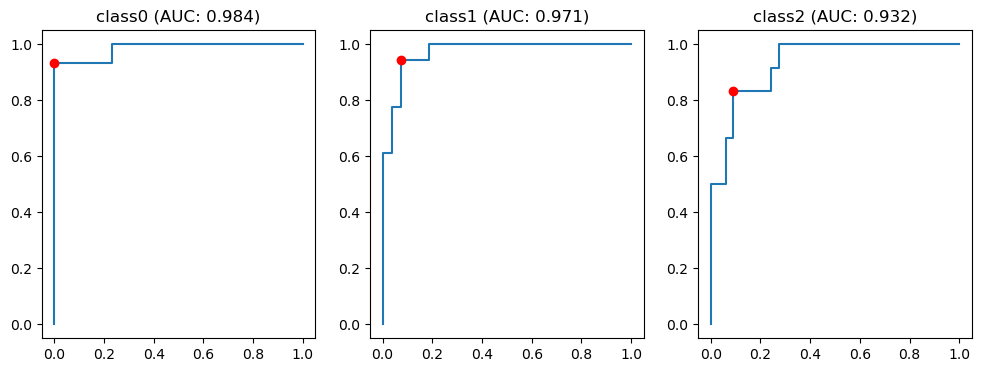

In [16]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

y_train2 = label_binarize(y_train, classes=np.unique(y_train))
y_test2 = label_binarize(y_test, classes=np.unique(y_test))
ovr_clf = OneVsRestClassifier(svm)
ovr_clf.fit(X_train, y_train2)
prob3 = ovr_clf.predict_proba(X_test)

fprs, tprs, aucs, best_thresholds, best_idx = [], [], [], [], []
for i in range(len(np.unique(y_train))):
    fpr, tpr, thresholds = roc_curve(y_test2[:,i], prob3[:,i])
    idx = np.argmax(tpr - fpr)
    best_threshold = thresholds[idx]
    auc = roc_auc_score(y_test2[:,i], prob3[:,i])
    fprs.append(fpr); tprs.append(tpr); aucs.append(auc); best_thresholds.append(best_threshold); best_idx.append(idx)
    
fig, axes = plt.subplots(1,3, figsize=(12,4))
for i, ax in enumerate(axes):
    ax.plot(fprs[i], tprs[i], label='ROC curve')
    ax.set_title(f"class{i} (AUC: {aucs[i]:.3f})")
    ax.plot(fprs[i][best_idx[i]], tprs[i][best_idx[i]], marker='o', color='red')
plt.show()

## 11-3 군집모델 평가 지표
1) 실제 군집 값이 없는 경우
- Silhouette coefficient
    - 군집 내 요소간 거리가 짧고, 다른 군집 간 거리가 멀 수록 값이 커진다
    - DBSCAN과 같은 밀도 기반 클러스터링에서 좋은 점수. 복잡한 모양에서는 잘 들어맞지 않음
- Calinski and HaraBasz score(=Variance ratio criterion)
    - 클러스터 내 분산과 클러스터 간 분산 간의 비율. 값이 클수록
- Davies-Bouldin score
    - 가장 유사한 군집이 있는 각 군집의 '평균' 유사성 측정값. 군집 내 거리와 군집 간 거리의 비율 => 낮을 수록 잘 된 클러스터링
    - 포인트 단위거리만 사용하므로 데이터 셋의 고유 수량과 기능만을 기반
    
2) 실제 군집값이 있는 경우
- Adjusted rand index(ARI) 
    - 무작위로 할당된 군집에 대한 ARI값은 0에 가까움
- Normalized mutual information (NMI) 
    - 실제 군집 값과 예측 군집갑의 상호 정보를 확인하여 상호 정보 없는 독립일 때는 0, 완벽한 상관관계 시 1
    - 측정값은 때때로 조정되지 않아 ARI 선호
- Homogeneity score (동질성)
    - 예측한 모든 군집들이 실제 군집의 단일 클래스로만 이루어져 있을 때 동질성 만족
- V-measure
    - Homogeneity score와 completeness score 의 조화평균
- Rand Index (For two clusterings)
    - 모든 샘플 쌍을 고려하고, 예측 및 실제 군집에서 동일하거나 다른 군집에 할당된 쌍을 계산하여 두 군집 간의 유사성 계산
- Mutual Information (For two clusterings)
    - 예측 및 실제 군집 간의 상호 정보를 확인하여 두 군집간의 유사성 계산

In [17]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score, normalized_mutual_info_score, completeness_score, homogeneity_score, v_measure_score, rand_score, mutual_info_score

X, target = load_iris()['data'], load_iris()['target']
kmeans = KMeans(n_clusters=3).fit(X)
cluster = kmeans.predict(X)

# 군집 값 없는 경우
functions = [silhouette_score, calinski_harabasz_score, davies_bouldin_score]
titles = ['silhouette', 'calinski', 'davies']
for f, t in zip(functions, titles):
    score = f(X, cluster)
    print(f"{t} : {score:.3f}")

# 군집 값 있는 경우
functions = [adjusted_rand_score, normalized_mutual_info_score, completeness_score, homogeneity_score, v_measure_score, rand_score, mutual_info_score ]
titles = ['ARI', 'NMI', 'completeness', 'homogeneity', 'v-measure', 'rand' ,'MI']
for f, t in zip(functions, titles):
    score = f(target, cluster)
    print(f"{t} : {score:.3f}")

silhouette : 0.553
calinski : 561.628
davies : 0.662
ARI : 0.730
NMI : 0.758
completeness : 0.765
homogeneity : 0.751
v-measure : 0.758
rand : 0.880
MI : 0.826


## 11-4 거리지표
### 1) 연속형 변수
- Euclidean distance : 통계적 개념이 내포되어 있지 않아, 변수들의 산포 정도가 감안 안됨
    $$d(x,y) = \sqrt{(x_1-y_1)^2 + \dots + (x_p-y_p}^2$$
- 표준화 거리 : 해당 변수의 표준편차로 척도 변환한 후 유클리드 거리 계산
    - 표준화하게 되면 척도 차이, 분산 차이로 인한 왜곡 피할 수 있음
- Manhattan distance : 건물을 가기 위한 최단거리
$$d(x,y) = \sum^p_{i=1}|x_i-y_i|$$
- Mahalanobis distance : 변수들 간 산포를 고려하여 표준화한 거리
    - 두 벡터 사이 거리를 산포를 의미하는 표본 공분산으로 나눔. 사진 지식 없이는 표본 공분산을 계산할 수 없으므로 사용하기 곤란 
    $$d(x,y)=\sqrt{(x-y)^TS^{-1}(x-y}$$
- Minkowski distance : 맨하탄 거리와 유클리드 거리를 한번에 표현
$$d(x,y) = |\sum^p_{i=1}|x_i-y_i|^m|^{1/m}$$
- canberra distance
$$d(x,y) = \sum^p_{i=1}\frac{|x_i-y_i}{x_i+y_i}$$
- Chebychev distance
$$d(x,y)=max|x_i-y_i|$$

In [26]:
from scipy.spatial.distance import euclidean, seuclidean, cityblock, minkowski, mahalanobis

NV1 = np.array([1,5,7,9])
NV2 = np.array([2,4,8,13])
V = np.array([0.1, 1, 10, 5])
IV = np.array([[1,0.5,0.5,0.1], [0.1,2,1,0.5], [0.5,0.5,1,0.2], [1,1,1,1]])

eu1 = euclidean(NV1, NV2)
eu2 = np.sqrt(((NV1 - NV2)**2).sum())
print(f"euclidean distance: {eu1:.3f} = {eu2:.3f}")

seu1 = seuclidean(NV1, NV2, V)
seu2 = np.sqrt(((NV1 - NV2)**2/V).sum())
print(f"euclidean distance: {seu1:.3f} = {seu2:.3f}")

man1 = cityblock(NV1, NV2)
man2 = np.abs(NV1 - NV2).sum()
print(f"manhattan distance: {man1:.3f} = {man2:.3f}")

p = 1
min1 = minkowski(NV1, NV2, p=1)
min2 = ((np.abs(NV1-NV2)**p).sum())**1/p
p = 2
min3 = minkowski(NV1, NV2, p=2)
min4 = np.sqrt(((np.abs(NV1-NV2))**p).sum())
print(f"minkowski distance(p=1) : {min1:.3f} = {min2:.3f}")
print(f"minkowski distance(p=2) : {min3:.3f} = {min4:.3f}")

mah1 = mahalanobis(NV1, NV2, IV)

mn = len(NV1)
reshaped_mat1 = (NV1-NV2).reshape(-1, mn)
result1 = np.dot(reshaped_mat1, IV)
reshaped_mat2 = (NV1-NV2).reshape(-mn, 1)
result2 = np.dot(result1, reshaped_mat2)
mah2 = float(np.sqrt(result2))
print(f"mahalanobis distance: {mah1:.3f} = {mah2:.3f}")

euclidean distance: 4.359 = 4.359
euclidean distance: 3.782 = 3.782
manhattan distance: 7.000 = 7.000
minkowski distance(p=1) : 7.000 = 7.000
minkowski distance(p=2) : 4.359 = 4.359
mahalanobis distance: 4.701 = 4.701


### 2) 범주형 변수의 거리
- Jaccard distance : 두 개체간 거리 측정에 사용. 유사도는 유사할 수록 1에 가까움
$$자카드\ 유사도 : \frac{A\cap B}{A\cup B}$$
- Cosine distance : 두 개체의 벡터 내적의 코사인 값
$$코사인\ 유사도:\frac{A \dot B}{||A||_2 \dot ||B||_2},\ 같은\ 인덱스에\ 있는\ 원소들끼리\ 곱해서\ 그\ 값들을\ 모두 합$$

In [31]:
from scipy.spatial.distance import jaccard, cosine
from sklearn.metrics import pairwise_distances

print("[Boolean data]")
bdf = pd.DataFrame({'Life':[1,1], 'Life2':[0,1], 'Life3':[0,1], 'Life4':[0,1],
                  'Love':[0,1], 'Love2':[0,1], 'Love3':[0,1], 'Love4':[0,1], 
                   'Love5':[0,1], 'Love6':[0,1], 'Love7':[0,1], 'learn' : [1,1],
                   'learn2' : [1,1], 'learn3' : [1,1], 'learn4' : [1,0], 'learn5' : [1,0],
                   }, index=['doc_1', 'doc_2'])
doc_1 = np.array(bdf.loc['doc_1', :])
doc_2 = np.array(bdf.loc['doc_2', :])
print(bdf)

# jaccard
jac1 = jaccard(doc_1, doc_2)
jac2 = pairwise_distances(bdf.values, metric='jaccard')[0][1]

check = pd.DataFrame(bdf.sum(), columns=['check'])
union = len(check[check['check'] != 0])
intersec = len(check[check['check'] == 2])
jac3 = 1 - intersec/union

print(f"jaccard distance : {jac1:.3f} = {jac2:.3f} = {jac3:.3f}")
print(f"jaccard similarity : {1-jac1:.3f} = {1-jac2:.3f} = {1-jac3:.3f}")

print("\n[Frequency Data]")
fdf = pd.DataFrame({"Life":[1,4], 'Love':[0,7], 'Learn':[5,3]}, index=['doc1', 'doc2'])
doc1 = np.array(fdf.loc['doc1', :])
doc2 = np.array(fdf.loc['doc2', :])
print(fdf)

# cosine
cos1 = cosine(doc_1, doc_2)
cos2 = pairwise_distances(fdf.values, metric='cosine')[0][1]

cossim = np.sum(doc1 * doc2) / ((np.sqrt(np.sum((doc1)**2))) * np.sqrt(np.sum((doc2)**2)))
cos3 = 1 - cossim
print(f" - cosine distance : {cos1:.3f} = {cos2:.3f} = {cos3:.3f}")
print(f" - cosine similarity : {1-cos1:.3f} = {1-cos2:.3f} = {1-cos3:.3f}")

[Boolean data]
       Life  Life2  Life3  Life4  Love  Love2  Love3  Love4  Love5  Love6  \
doc_1     1      0      0      0     0      0      0      0      0      0   
doc_2     1      1      1      1     1      1      1      1      1      1   

       Love7  learn  learn2  learn3  learn4  learn5  
doc_1      0      1       1       1       1       1  
doc_2      1      1       1       1       0       0  
jaccard distance : 0.750 = 0.750 = 0.750
jaccard similarity : 0.250 = 0.250 = 0.250

[Frequency Data]
      Life  Love  Learn
doc1     1     0      5
doc2     4     7      3
 - cosine distance : 0.564 = 0.567 = 0.567
 - cosine similarity : 0.436 = 0.433 = 0.433


In [32]:
# prac 1

In [33]:
# prac 2

In [34]:
# prac 3